# AARRR 지표 중 Acquisition 확인
---


In [17]:
## 1.필요 라이브러리 정리 
import pandas as pd

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

# 그룹화를 위해서
from itertools import groupby


In [2]:
# 인증
key_path = "/home/user/codeit_project/codeit-project-docker/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced_data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced_data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced_data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced_data-bucket/votes/accounts_group.parquet', 'gs://my-advanced_data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced_data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_school.parquet', 'gs://my-advanced_data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced_data-bucket/vot

In [3]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

## Vote 데이터로 확인
---
- created_at이 회원가입 완료한 시점에 대한 데이터임을 확인
    - 해당 데이터는 hackle_properties와 hackle_events 병합 데이터와 accounts_user 통해서 확인(looking_for_AARRR 파일에 존재)
- 그렇기 때문에 accounts_user의 created_at의 값은 회원가입이 완료된 시점으로 판단할 수 잇음


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


accounts_user 데이터 타입 확인
id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object


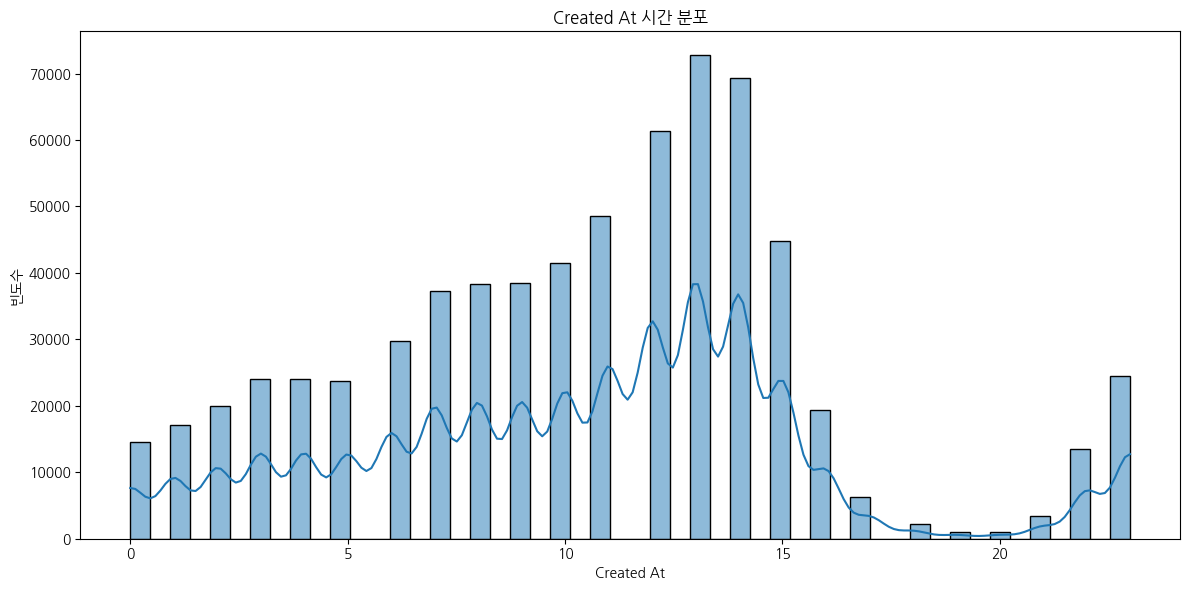

In [7]:
# 복사본 제작을 위해서
accounts_user = df_dict["accounts_user"].copy()
display(accounts_user.head())

# 우선 데이터 타입 확인
print("accounts_user 데이터 타입 확인")
print(accounts_user.dtypes)

# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

In [8]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced_data-bucket/hackle_final/final_hackle.parquet",
    storage_options={"token": "/home/user/codeit_project/codeit-project-docker/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,1,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,2849,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
2,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
3,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,64.0,NaN,4830.0,2,1046711,D5417226-F71B-4A9E-A180-CD072F2AB279
4,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,64.0,NaN,4830.0,74795,1046711,D5417226-F71B-4A9E-A180-CD072F2AB279


In [10]:
# 데이터 타입 확인
print("final_hackle_df 데이터 타입 확인")
print(final_hackle_df.dtypes)

# 데이터 크기 확인
print("final_hackle_df 데이터 크기 확인")
print(final_hackle_df.shape)

# event_key가 "complete_signup"인 데이터 추출
complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# 데이터 크기 확인
print("complete_signup_df 데이터 크기 확인")
print(complete_signup_df.shape)

final_hackle_df 데이터 타입 확인
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
dtype: object
final_hackle_df 데이터 크기 확인
(27286379, 10)
complete_signup_df 데이터 크기 확인
(2295, 10)


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id
48901,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,2023-07-20 19:06:26,complete_signup,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,0.0,NaN,300.0,11823,1579148,EBB7AAFB-6071-458C-A8EA-3B27E8960C71
48902,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,2023-07-20 19:06:26,complete_signup,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,0.0,NaN,300.0,17894,1579148,EBB7AAFB-6071-458C-A8EA-3B27E8960C71
48903,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,2023-07-20 19:06:26,complete_signup,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,0.0,NaN,300.0,134801,1579148,EBB7AAFB-6071-458C-A8EA-3B27E8960C71
83941,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,2023-07-29 19:47:57,complete_signup,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba,0.0,NaN,300.0,28809,1579577,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba
83942,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,2023-07-29 19:47:57,complete_signup,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba,0.0,NaN,300.0,287976,1579577,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba


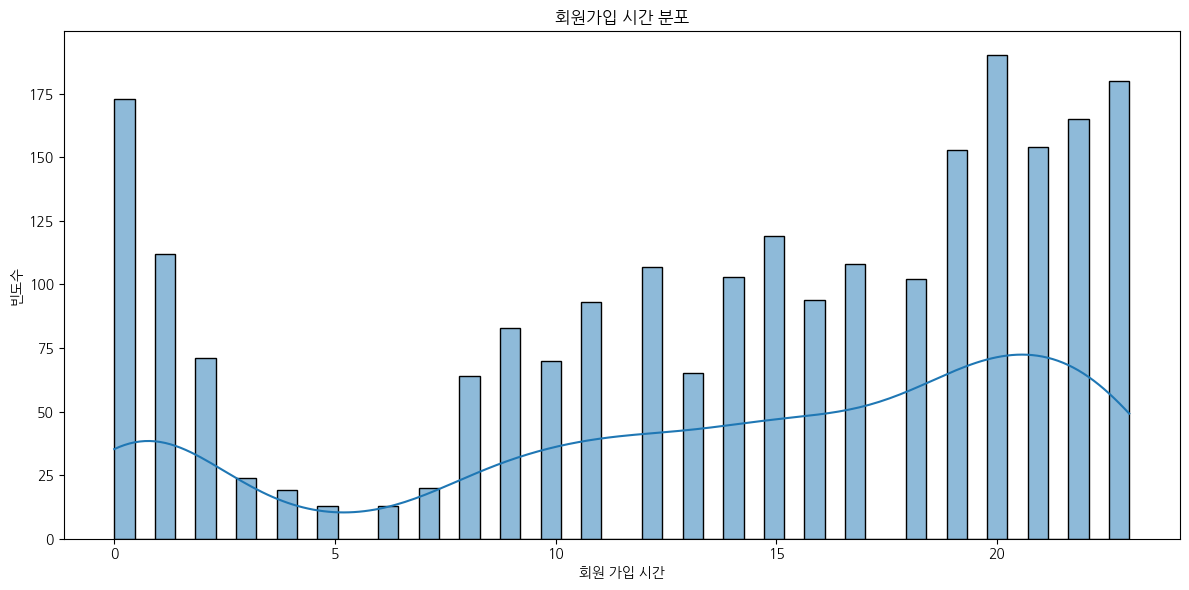

In [12]:
# 필터링한 데이터 확인
display(complete_signup_df.head())

# 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(complete_signup_df['event_datetime'].dt.hour, bins=50, kde=True)
plt.title('회원가입 시간 분포')
plt.xlabel('회원 가입 시간')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- created_at에 9시간을 더해야한다는 이유
    - hackle 데이터와 accounts_user 데이터 살펴보면 9시간 차이가 남
    - 그리고 물론 점심 시간에 회원가입? 가능하다고 생각됨 하지만 새벽 시간대에 이용하는 유저가 지나치게 많아짐

In [13]:
# 만약 account_user 데이터에 created_at에 9시간을 더하게 되면? 시간대 분포는?
accounts_user["created_at_plus_9"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

# 데이터 확인
display(accounts_user.head())

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,created_at_plus_9
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,2023-03-29 12:44:14.047130
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,2023-03-29 14:18:56.162368
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,2023-03-29 21:56:34.989468
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,2023-03-29 21:56:35.020790
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,2023-03-29 21:56:35.049311


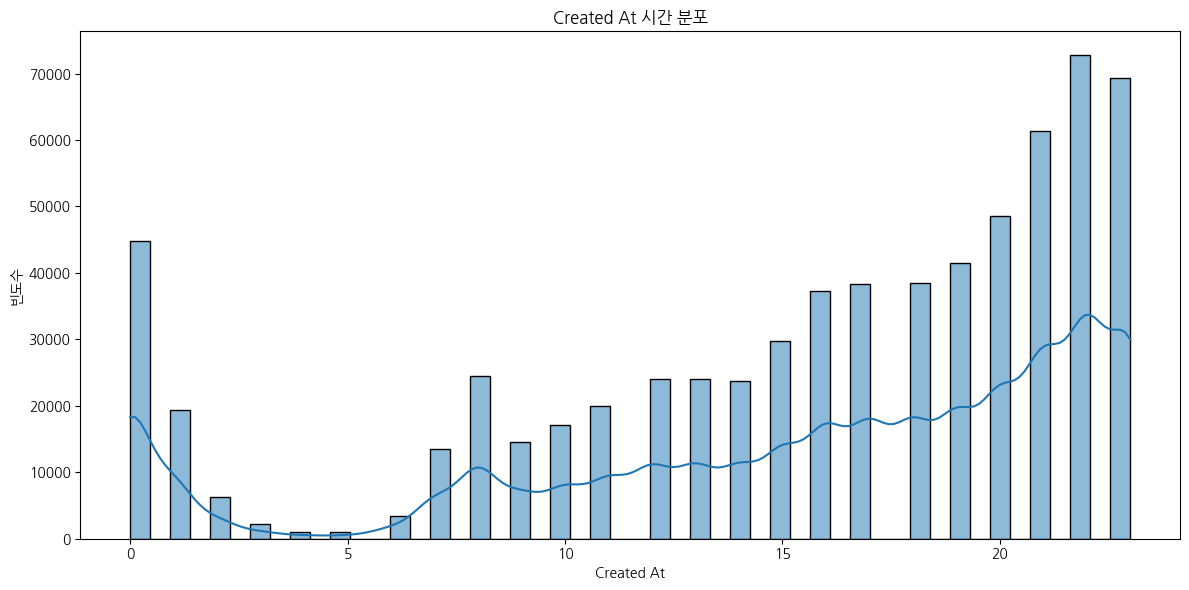

In [14]:
# 9시간을 더한 결과에 대해서 시각화 진행
# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at_plus_9'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- 위 내용을 통해서는 유저 획득이 오히려 밤에 이루어지는 경우가 존재함
- 저녁이나 밤에 활동이 많은 것은 확인함 그렇다면 점심이나 이른 시간대에는?
    - 방학이나 주말인 경우에 다를까?

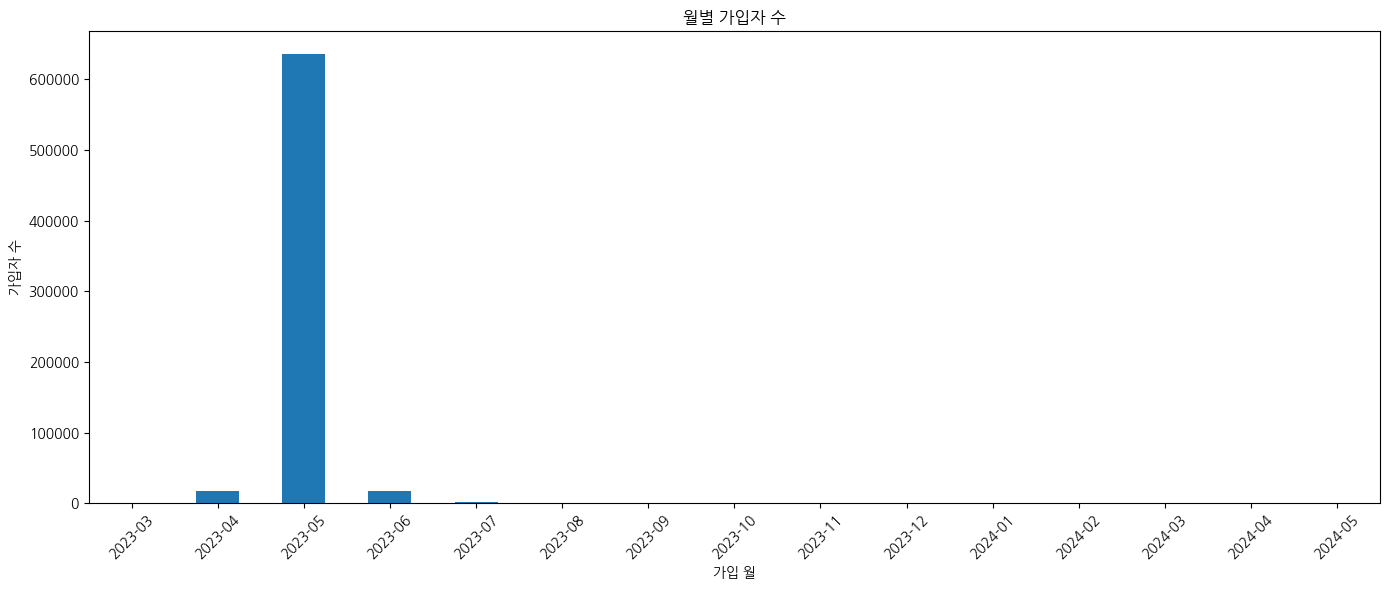

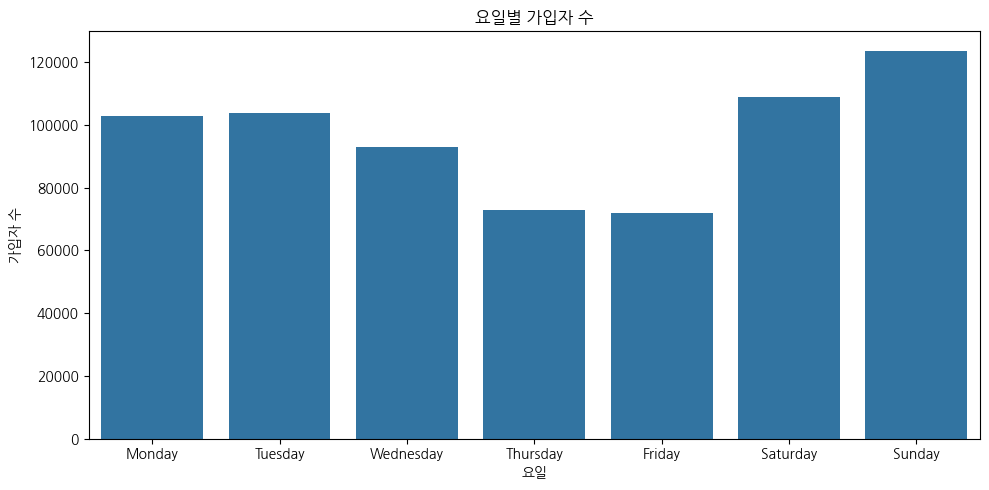

In [15]:
# 월별 가입자 수 집계 및 시각화
accounts_user['month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_counts = accounts_user.groupby('month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='bar')
plt.title('월별 가입자 수')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 요일별 가입자 수 집계 및 시각화
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = accounts_user['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('요일별 가입자 수')
plt.xlabel('요일')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

- 주말에 좀 더 많은 회원가입이 있었음
- 평일 중 화요일~금요일까지는 감소하는 형태가 보임
    - 때문에 목요일, 금요일에 확실히 큰 감소가 보임

추가로 볼 내용들

- 페이지 흐름 분석 (Signup Funnel)      
회원가입 전 어떤 페이지(또는 행동)들을 거치는가?        
목적 : 이탈률이 높은 지점은 어디인가?       

- 가입 소요 시간 분석       
방문해서 가입하기까지 걸린 시간 분포        
목적 : 바로 가입 vs 여러 번 방문 후 가입 구분       

- 신규 가입자의 초기 행동       
가입 직후 유저가 어떤 행동을 했는가?        
"활성화(Activation)"로 넘어가는 힌트를 여기서 얻음      

- 지역/시간대 기반 분석 (Geo-Temporal)      
지역별 가입자 수 (시/도, 나라, 도시 등)     
지역별 시간대 패턴 차이     



In [ ]:
# 회원가입 전 event_key의 흐름을 파악하기 위해, 회원가입 완료 이벤트("complete_signup")가 발생한 session_id를 추출
signup_sessions = complete_signup_df['session_id'].unique()

# 해당 session_id에 속한 모든 이벤트를 추출
signup_sessions_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_sessions)].copy()

# 각 session별로 event_key의 순서를 확인
signup_sessions_events_sorted = signup_sessions_events.sort_values(['session_id', 'event_datetime'])

# 예시: 한 session의 event_key 시퀀스 확인
example_session_id = signup_sessions_events_sorted['session_id'].iloc[0]
example_session_events = signup_sessions_events_sorted[signup_sessions_events_sorted['session_id'] == example_session_id]['event_key'].tolist()
print(f"Example session ({example_session_id}) event sequence:")
print(example_session_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)

# session별 event_key 시퀀스 추출
session_event_sequences = (
    signup_sessions_events_sorted.groupby('session_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = session_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences:")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example session (00181B41-078B-4CA0-815F-72D24E5DDF9A) event sequence:
['launch_app', 'launch_app', 'launch_app', '$session_end', '$session_end', '$session_end', 'launch_app', 'launch_app', 'launch_app', '$session_start', '$session_start', '$session_start', '$session_end', '$session_end', '$session_end', 'launch_app', 'launch_app', 'launch_app', 'launch_app', 'launch_app', 'launch_app', '$session_start', '$session_start', '$session_start', '$session_start', '$session_start', '$session_start', 'launch_app', 'launch_app', 'launch_app', 'launch_app', 'launch_app', 'launch_app', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', '$session_end', '$session_end', '$session_end', 'view_signup', 'view_signup', 'view_signup', '$session_

In [18]:
# event_key가 'complete_signup'인 데이터 중 user_id가 있는 경우와 없는 경우 수 파악
complete_signup_events = signup_sessions_events[signup_sessions_events['event_key'] == 'complete_signup']

user_id_exists = complete_signup_events['user_id'].notnull().sum()
user_id_missing = complete_signup_events['user_id'].isnull().sum()

print(f"user_id가 있는 경우: {user_id_exists}건")
print(f"user_id가 없는 경우: {user_id_missing}건")

user_id가 있는 경우: 2295건
user_id가 없는 경우: 0건


In [19]:
from collections import Counter

# complete_signup 바로 직전 event_key를 찾기 위한 코드

# session_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# session_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_sessions_events_sorted.groupby('session_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
complete_signup: 1321회
$session_start: 534회
$session_end: 307회
view_signup: 133회
